<a href="https://colab.research.google.com/github/XAheli/Predicting-Indian-Stocks-Price-with-Stacked-LSTM/blob/main/Indian_Stocks_Prediction_using_Stacked_Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas_datareader.data import DataReader
import warnings
from datetime import datetime
import yfinance as yf

warnings.filterwarnings("ignore")

In [2]:
# Set the end date to today
end_date = datetime.now().date()

# Set the start date to one year ago
start_date = end_date.replace(year=end_date.year - 1)


In [3]:
# Define the list of Indian stock symbols (NSE or BSE)
stock_symbols = ["RELIANCE.NS", "TATASTEEL.NS", "HDFCBANK.NS", "INFY.NS"]

# Define the corresponding company names
company_names = ["Reliance Industries", "Tata Steel", "HDFC Bank", "Infosys"]

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.download(symbol, start=start_date, end=end_date)
    stock_data[symbol] = stock["Adj Close"]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Print the first few rows of the stock data
print(stock_data.head())



            RELIANCE.NS  TATASTEEL.NS  HDFCBANK.NS      INFY.NS
Date                                                           
2022-09-20  2494.040039    102.456017  1503.458496  1337.331055
2022-09-21  2500.915771    101.148682  1501.135132  1326.447754
2022-09-22  2477.348877    100.325546  1469.151855  1317.490845
2022-09-23  2430.912842    101.003426  1429.753784  1315.083008
2022-09-26  2368.981689     96.694069  1410.474854  1329.337158


In [34]:
# Create an empty list to store DataFrames for each stock
stock_dfs = []

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(start=start_date, end=end_date)
    stock_data["Company"] = symbol  # Add a new column with the company's symbol
    stock_dfs.append(stock_data)

# Concatenate the DataFrames into a single DataFrame
data = pd.concat(stock_dfs, axis=0)

# Print the last few rows of the data
print(data.tail())

                                  Open         High          Low        Close  \
Date                                                                            
2023-09-13 00:00:00+05:30  1505.000000  1505.000000  1488.650024  1498.349976   
2023-09-14 00:00:00+05:30  1505.000000  1512.550049  1499.150024  1506.949951   
2023-09-15 00:00:00+05:30  1518.000000  1518.400024  1509.000000  1511.599976   
2023-09-18 00:00:00+05:30  1504.900024  1504.900024  1488.000000  1491.800049   
2023-09-20 00:00:00+05:30  1476.199951  1495.099976  1476.199951  1490.250000   

                            Volume  Dividends  Stock Splits  Company  
Date                                                                  
2023-09-13 00:00:00+05:30  4804686        0.0           0.0  INFY.NS  
2023-09-14 00:00:00+05:30  6444213        0.0           0.0  INFY.NS  
2023-09-15 00:00:00+05:30  8657816        0.0           0.0  INFY.NS  
2023-09-18 00:00:00+05:30  3991916        0.0           0.0  INFY.NS  
2023-0

In [35]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.0
mean,1394.799502,1405.472506,1382.793508,1393.939833,1.699640e+07,0.079294,0.0
std,850.142941,856.648773,842.777720,849.532458,1.908487e+07,1.128396,0.0
min,93.498377,94.757284,91.997364,92.191040,0.000000e+00,0.000000,0.0
25%,928.974268,931.931762,898.240597,926.349743,5.052427e+06,0.000000,0.0
50%,1506.048782,1516.690957,1494.818042,1507.071350,8.002021e+06,0.000000,0.0
75%,1844.388229,1871.171366,1828.431603,1844.525330,2.288986e+07,0.000000,0.0
max,2820.038295,2845.946774,2787.154456,2831.846680,1.434441e+08,19.000000,0.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_19, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close'], ['Close', 'Volume']]], **{})
chart

# 2. Exploratory Data Analysis

### 2.1 Overview of all 4 companies

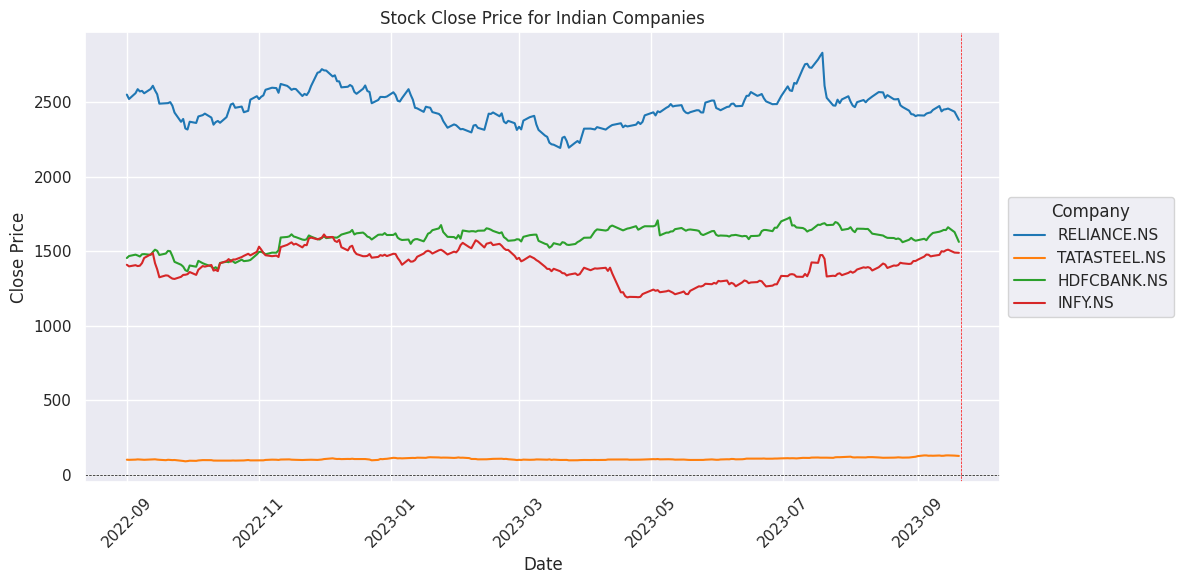

In [36]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the close prices for each company
ax = sns.lineplot(
    x=data.index,
    y="Close",
    data=data,
    hue="Company",
    palette="tab10"
)

# Set titles and labels
ax.set(
    title="Stock Close Price for Indian Companies",
    xlabel="Date",
    ylabel="Close Price"
)

# Display the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Company')

# Rotate x-axis labels
plt.xticks(rotation=45)

# grid lines
ax.grid(True)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# horizontal line at y=0 for reference
plt.axvline(end_date, color='red', linestyle='--', linewidth=0.5, label='Today')

# plot
plt.tight_layout()
plt.show()

### 2.2 Adjusted Close Price Each Stock

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')


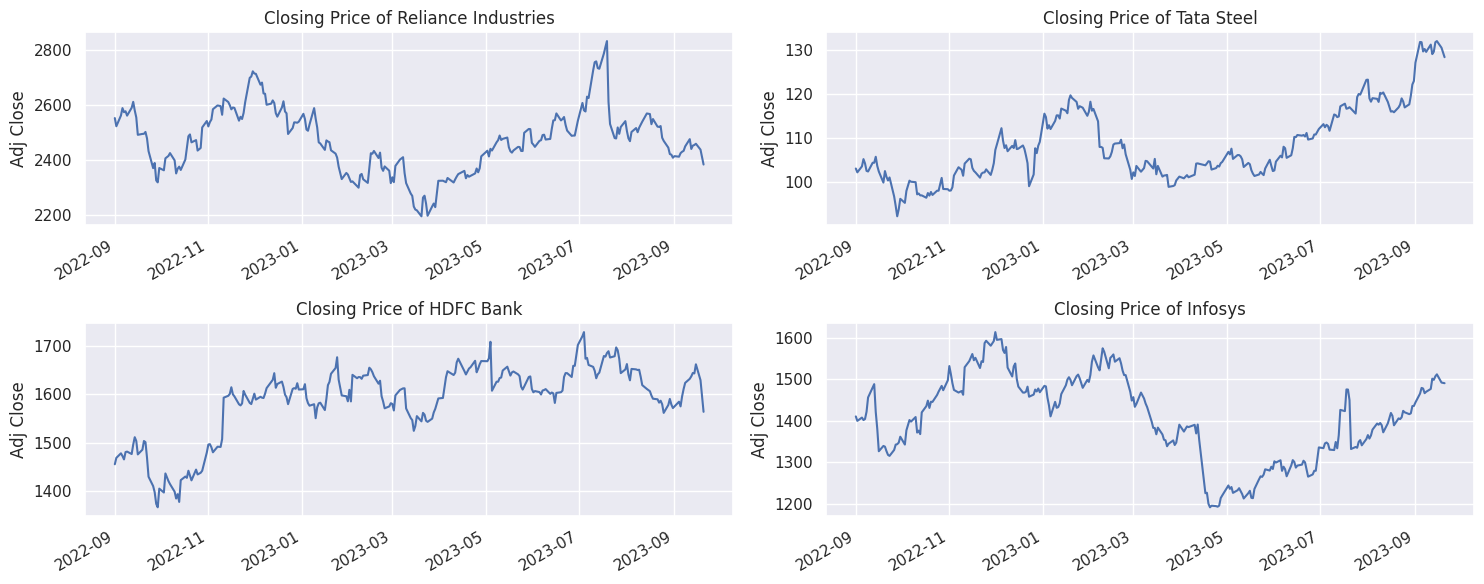

In [37]:
# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):

    print(stock_df.columns)

    # Update the column name based on the actual column name
    column_name = "Close"

    stock_df[column_name].plot(ax=ax)
    ax.set_ylabel("Adj Close")
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 2.3 Total Volume of Stock traded Each Day

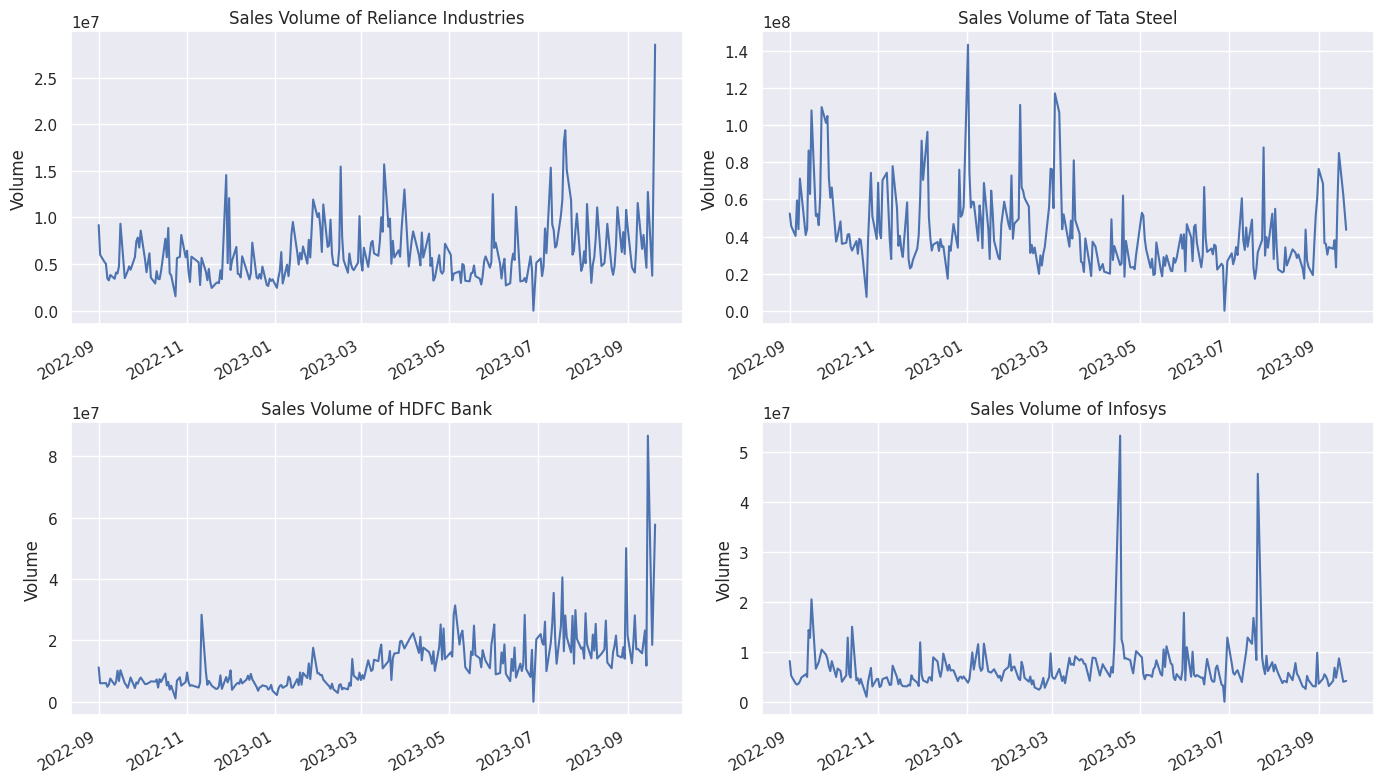

In [38]:
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    stock_df["Volume"].plot(ax=ax)
    ax.set_ylabel("Volume")
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 2.4 Moving Average of Each Stock

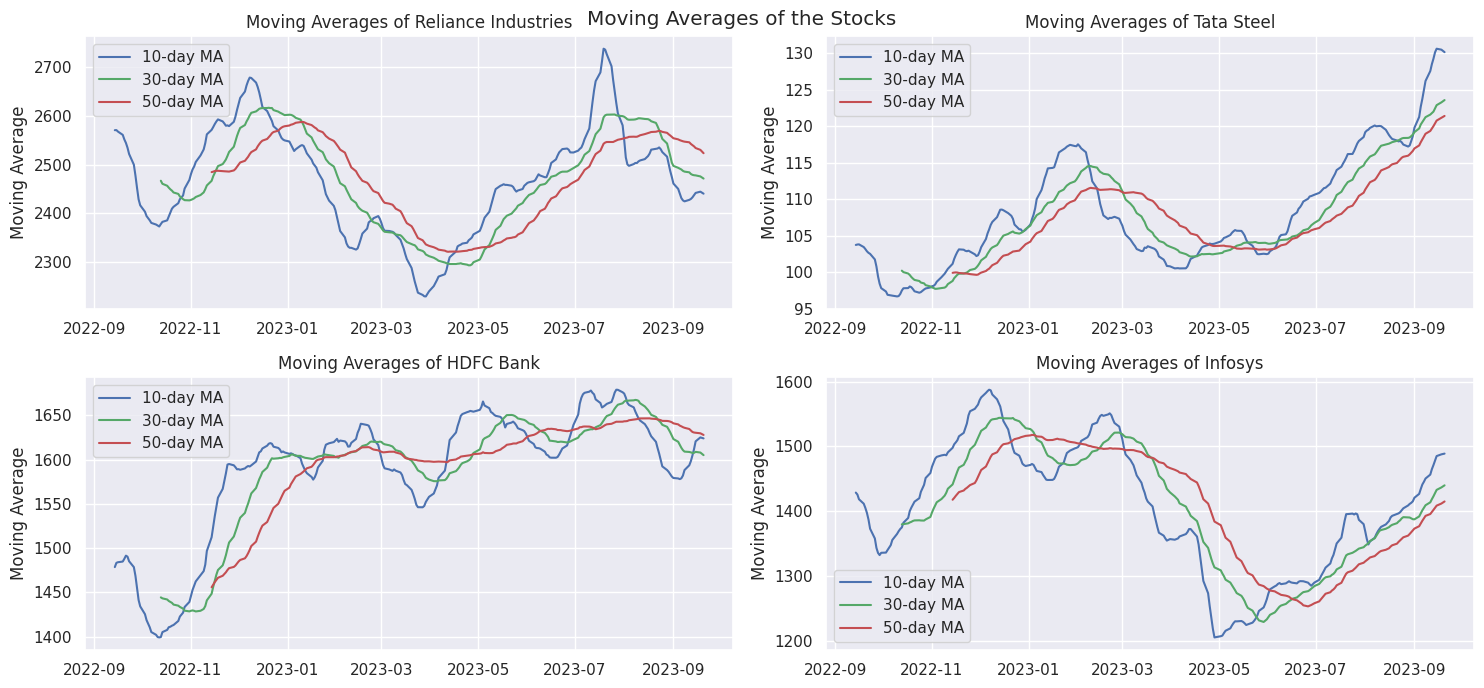

In [39]:
# Define the moving averages and line colors
moving_averages = [10, 30, 50]
line_colors = ['b', 'g', 'r']

# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    for ma, color in zip(moving_averages, line_colors):
        ma_col = f"MA for {ma} days"

        # Check if the column name exists in the DataFrame
        if "Close" in stock_df.columns:
            stock_df[ma_col] = stock_df["Close"].rolling(ma).mean()
            sns.lineplot(
                x=stock_df.index,
                y=stock_df[ma_col],
                data=stock_df,
                ax=ax,
                label=f"{ma}-day MA",
                color=color,
            )
        else:
            print(f"Closing price data not found for {company_name}")

    ax.set(
        title=f"Moving Averages of {company_name}",
        xlabel=None,
        ylabel="Moving Average",
    )

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.suptitle("Moving Averages of the Stocks")
plt.legend()
plt.show()


### 2.5 Daily Return

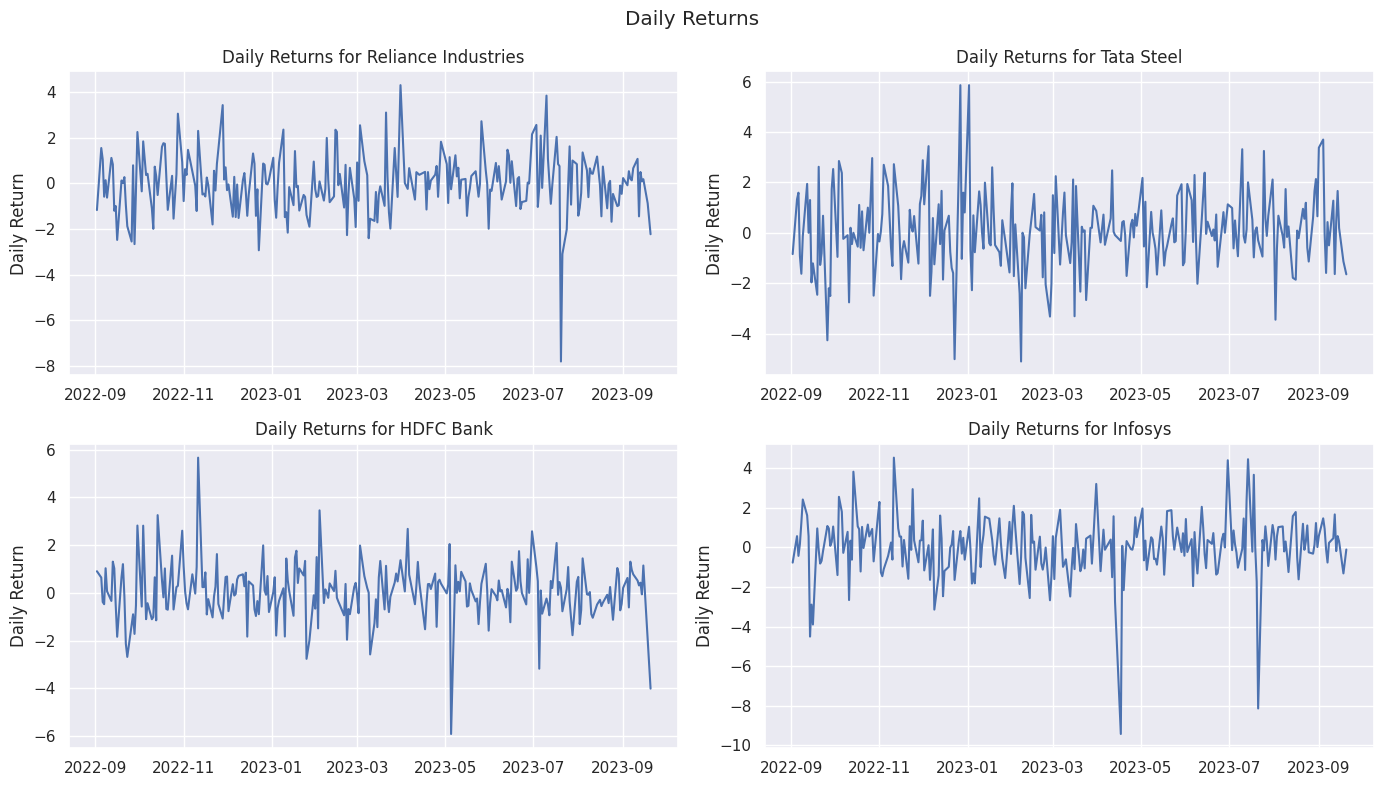

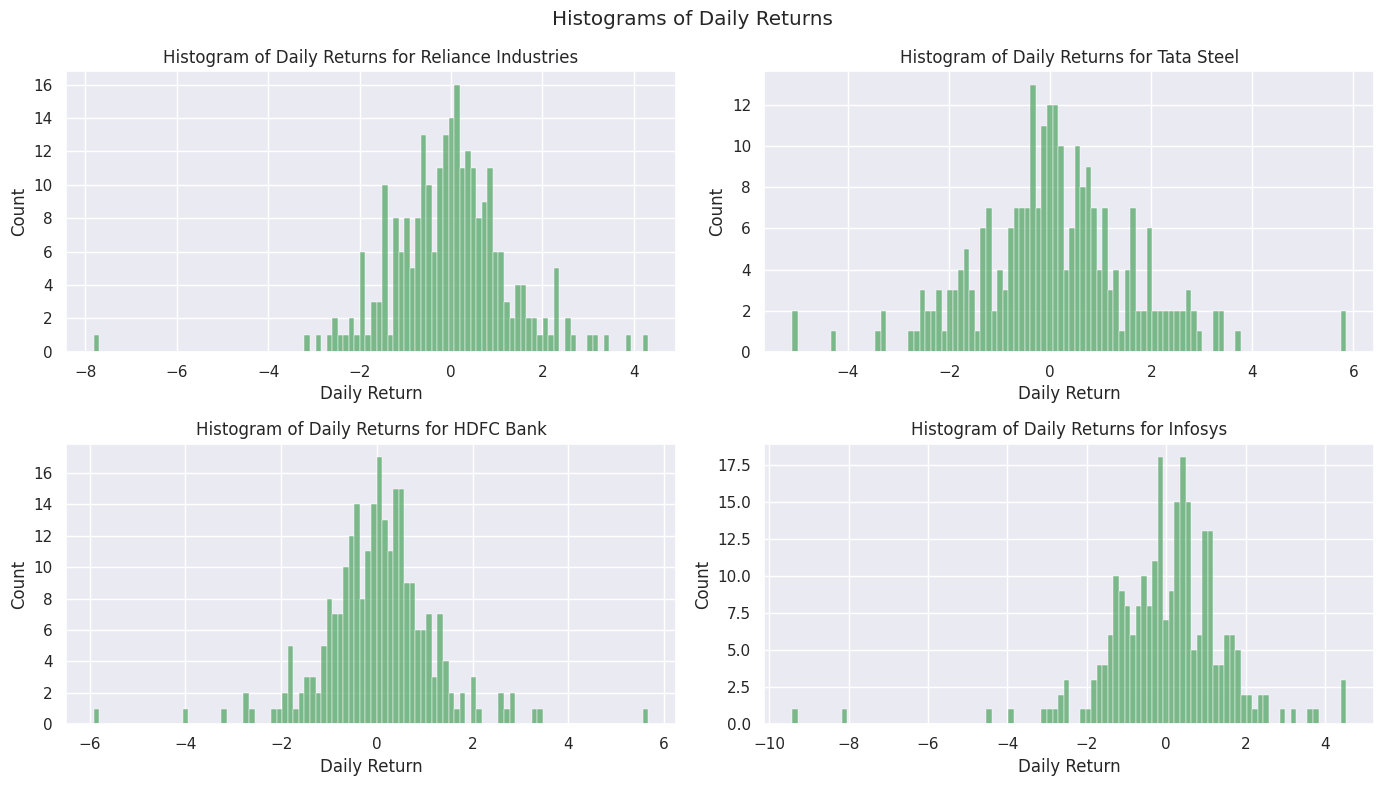

In [40]:
# daily returns for each stock
for stock_df in stock_dfs:
    stock_df["Daily Return"] = stock_df["Close"].pct_change() * 100  # Calculate daily returns in percentage

# subplots
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        x=stock_df.index,
        y="Daily Return",
        data=stock_df,
        color='b',
    )
    plt.title(f"Daily Returns for {company_names[i-1]}")
    plt.xlabel(None)
    plt.ylabel("Daily Return")

plt.suptitle("Daily Returns")
plt.tight_layout()

plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        stock_df["Daily Return"].dropna(),
        bins=100,
        color='g',
    )
    plt.title(f"Histogram of Daily Returns for {company_names[i-1]}")

plt.suptitle("Histograms of Daily Returns")
plt.tight_layout()

plt.show()


### 2.6 Correlation between different stocks & closing prices

In [41]:
# Create a DataFrame containing only the closing prices of Indian stocks
closing_df = data.pivot(columns='Company', values='Close')

# Print the closing prices DataFrame
print(closing_df.head())


Company                    HDFCBANK.NS      INFY.NS  RELIANCE.NS  TATASTEEL.NS
Date                                                                          
2022-09-01 00:00:00+05:30  1455.458984  1410.190430  2551.387207    103.037048
2022-09-02 00:00:00+05:30  1468.657593  1399.403687  2521.592529    102.165497
2022-09-05 00:00:00+05:30  1478.099365  1407.397583  2560.754395    103.521248
2022-09-06 00:00:00+05:30  1472.463867  1401.426147  2587.709229    105.167511
2022-09-07 00:00:00+05:30  1465.493896  1403.882080  2572.662109    104.199120


In [63]:
pct_closing = closing_df.pct_change()
pct_closing

Company,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,
2022-09-01 00:00:00+05:30,NaN,NaN,NaN,NaN
2022-09-02 00:00:00+05:30,0.009068,-0.007649,-0.011678,-0.008459
2022-09-05 00:00:00+05:30,0.006429,0.005712,0.015531,0.013270
2022-09-06 00:00:00+05:30,-0.003813,-0.004243,0.010526,0.015903
2022-09-07 00:00:00+05:30,-0.004734,0.001752,-0.005815,-0.009208
...,...,...,...,...
2023-09-13 00:00:00+05:30,0.004276,-0.001832,0.005002,0.004264
2023-09-14 00:00:00+05:30,-0.000608,0.005740,0.000918,0.016596
2023-09-15 00:00:00+05:30,0.011474,0.003086,0.001855,0.001898


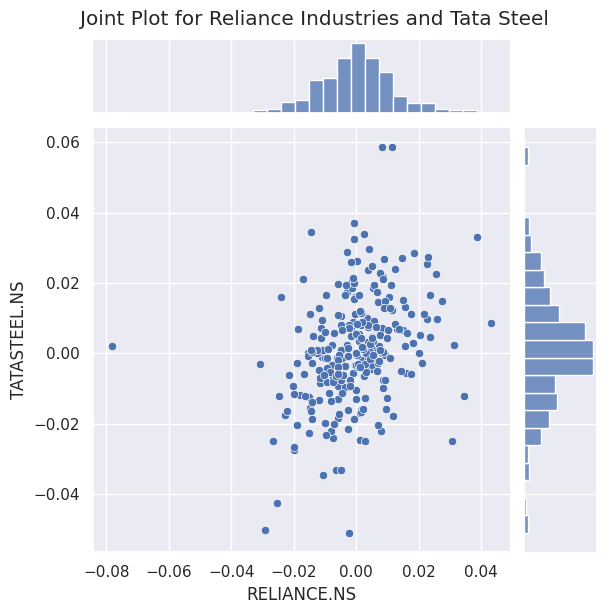

In [43]:

sns.jointplot(x=pct_closing["RELIANCE.NS"], y=pct_closing["TATASTEEL.NS"])


plt.suptitle("Joint Plot for Reliance Industries and Tata Steel", y=1.02)


plt.show()


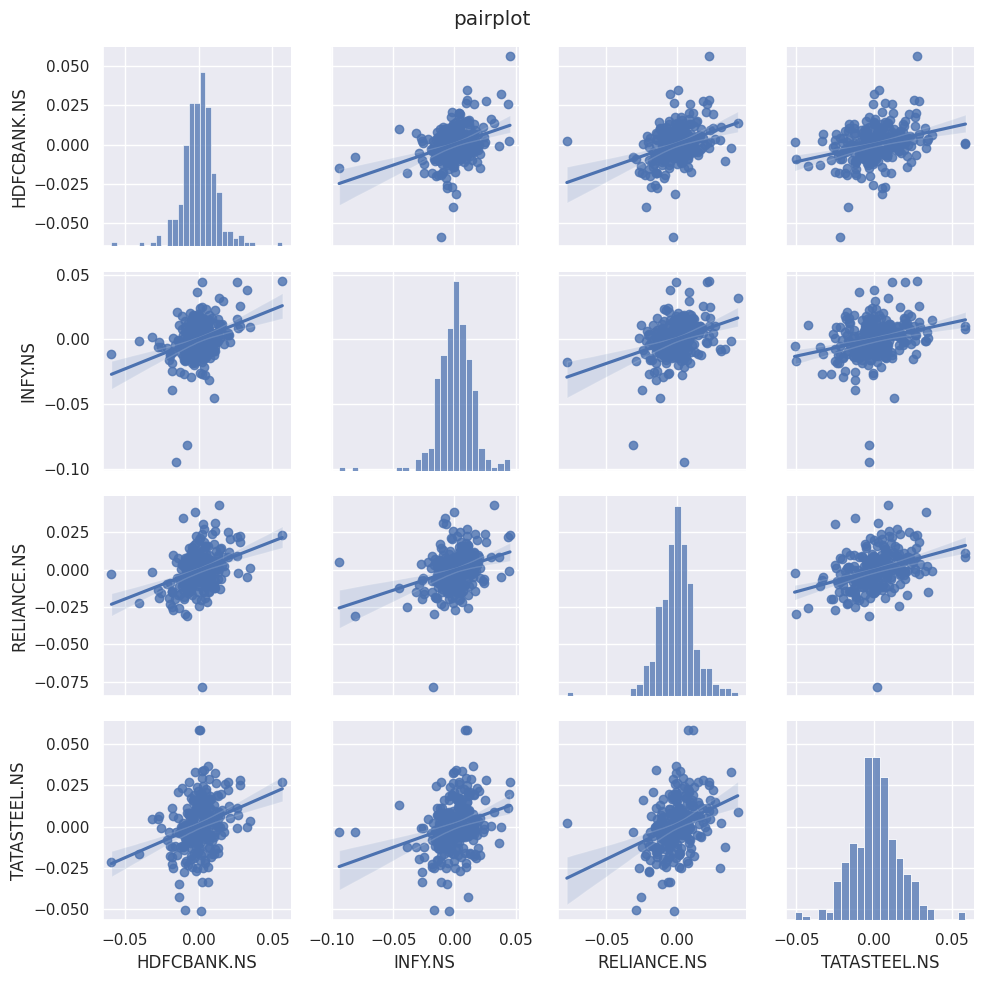

In [44]:
sns.pairplot(pct_closing, kind = "reg")
plt.suptitle("pairplot")
plt.tight_layout()

<Axes: xlabel='Company', ylabel='Company'>

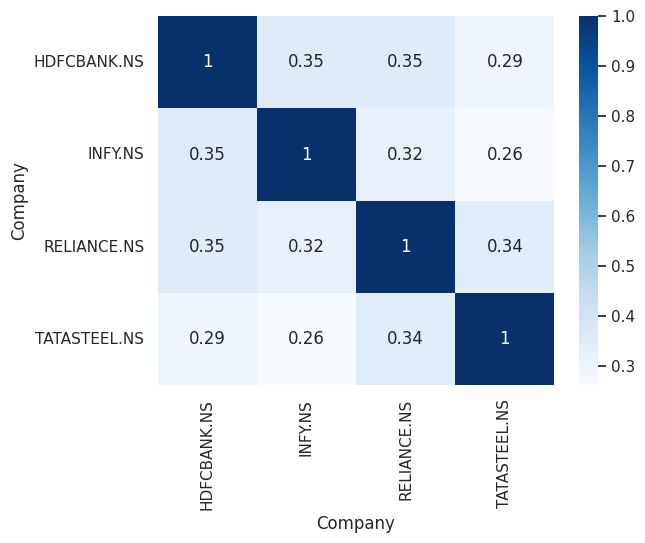

In [45]:
sns.heatmap(pct_closing.corr(), annot=  True, cmap = "Blues")

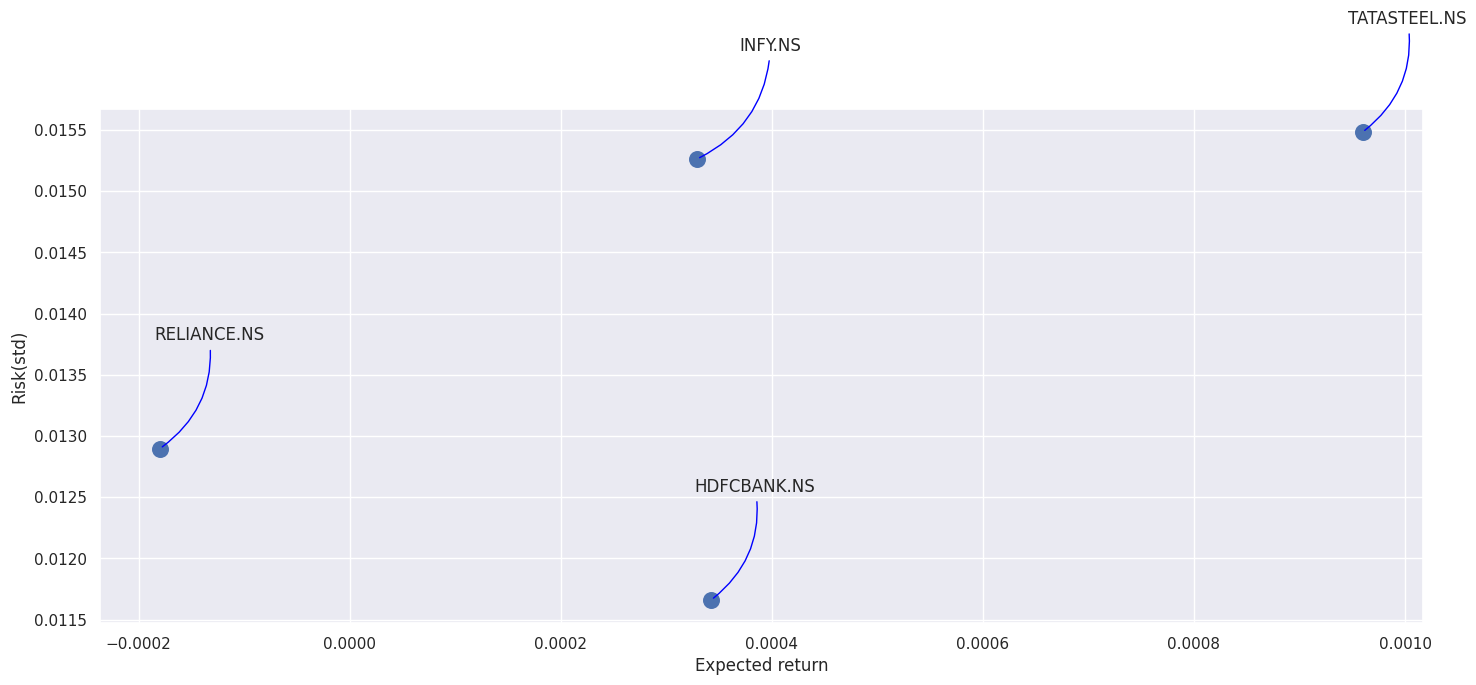

In [46]:
pct_closing = pct_closing.dropna()
area = np.pi * 40

plt.figure(figsize = (15, 7))
plt.scatter(pct_closing.mean(), pct_closing.std(), s = area)
plt.xlabel("Expected return")
plt.ylabel("Risk(std)")

for label, x, y in zip(
    pct_closing.columns,
    pct_closing.mean(),
    pct_closing.std()
):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (75, 75),
        textcoords = "offset points",
        ha = "right",
        va = "bottom",
        arrowprops = dict(
            arrowstyle = '-',
            color = 'blue',
            connectionstyle = 'arc3,rad = -0.3'
        )
    )

plt.tight_layout()

# 3. PREDICTING STOCK PRICE


### 3.1 here using RELIANCE.NS as a test case

In [47]:

stock_symbol = 'RELIANCE.NS'
start_date = '2022-09-01'
end_date = datetime.now()

# Fetch data for Reliance using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

print(df)


[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-09-01  2582.649902  2604.949951  2550.699951  2560.399902  2551.387207   
2022-09-02  2560.399902  2575.350098  2525.699951  2530.500000  2521.592529   
2022-09-05  2531.000000  2581.500000  2531.000000  2569.800049  2560.754395   
2022-09-06  2573.000000  2606.000000  2572.000000  2596.850098  2587.709229   
2022-09-07  2575.000000  2594.899902  2570.000000  2581.750000  2572.662109   
...                 ...          ...          ...          ...          ...   
2023-09-13  2440.000000  2462.649902  2426.250000  2451.050049  2451.050049   
2023-09-14  2460.000000  2465.800049  2445.000000  2453.300049  2453.300049   
2023-09-15  2468.000000  2468.000000  2449.500000  2457.850098  2457.850098   
2023-09-18  2440.050049  2451.000000  2432.050049  2436.449951

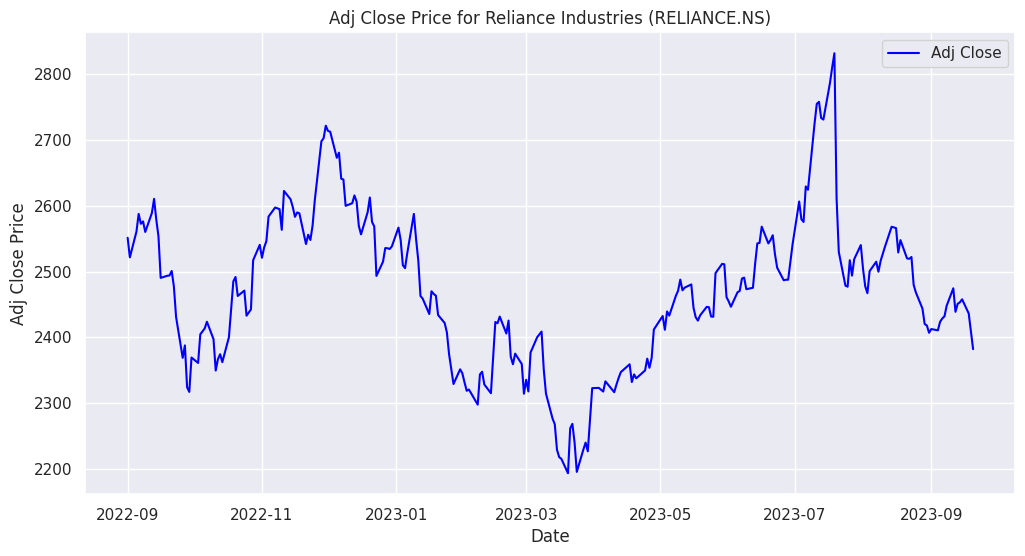

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.title('Adj Close Price for Reliance Industries (RELIANCE.NS)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)

plt.show()

In [49]:
data = df.filter(["Close"])
dataset = data.values

training_data_len = int(
    np.ceil(len(dataset)* 0.95)
)
training_data_len

249

### LSTM are sensitive to the scale of the data so I applied minmax scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.56064603],
       [0.5139712 ],
       [0.57532   ],
       [0.61754611],
       [0.59397431],
       [0.59967194],
       [0.57453948],
       [0.61941928],
       [0.65329369],
       [0.6042773 ],
       [0.56423649],
       [0.46511069],
       [0.47018405],
       [0.4708087 ],
       [0.4815797 ],
       [0.44466134],
       [0.3719169 ],
       [0.27489864],
       [0.30440208],
       [0.20480789],
       [0.19364663],
       [0.27552291],
       [0.26264436],
       [0.33086157],
       [0.34475502],
       [0.36075564],
       [0.31931005],
       [0.24453618],
       [0.27162031],
       [0.28340621],
       [0.26451752],
       [0.32391503],
       [0.39025907],
       [0.45683712],
       [0.46729637],
       [0.42202631],
       [0.43490486],
       [0.3751171 ],
       [0.39010282],
       [0.50718054],
       [0.54378714],
       [0.51295668],
       [0.53762075],
       [0.55245059],
       [0.61114571],
       [0.63276621],
       [0.62870737],
       [0.579

In [51]:
train_data = scaled_data[0: int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
"""    if i <= 61:
        print(x_train)
        print(y_train)
        print()"""

print(x_train[0])
print(y_train[0])

[0.56064603 0.5139712  0.57532    0.61754611 0.59397431 0.59967194
 0.57453948 0.61941928 0.65329369 0.6042773  0.56423649 0.46511069
 0.47018405 0.4708087  0.4815797  0.44466134 0.3719169  0.27489864
 0.30440208 0.20480789 0.19364663 0.27552291 0.26264436 0.33086157
 0.34475502 0.36075564 0.31931005 0.24453618 0.27162031 0.28340621
 0.26451752 0.32391503 0.39025907 0.45683712 0.46729637 0.42202631
 0.43490486 0.3751171  0.39010282 0.50718054 0.54378714 0.51295668
 0.53762075 0.55245059 0.61114571 0.63276621 0.62870737 0.57953472
 0.67210425 0.65220104 0.63385886 0.61052145 0.62098031 0.61879463
 0.54581619 0.56790508 0.55541679 0.58983771 0.64993761 0.79035275]
0.7976114162974324


In [52]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(189, 60, 1)

### **Creating the Stacked LSTM**

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

model = Sequential()

# First LSTM layer with 16 units
model.add(LSTM(16, input_shape=(x_train.shape[1], 1), return_sequences=True))

# Second LSTM layer with 16 units and swish activation
model.add(LSTM(16, return_sequences=True, activation='swish'))

# Third LSTM layer with 16 units, no return sequences and swish activation
model.add(LSTM(16, return_sequences=False, activation='swish'))

# Output layer with swish activation
model.add(Dense(1, activation='swish'))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Fit the model to the data
model.fit(x_train, y_train, batch_size=50, epochs=52)


Epoch 1/52
4/4 [==============================] - 4s 40ms/step - loss: 0.2195
Epoch 2/52
4/4 [==============================] - 0s 44ms/step - loss: 0.2147
Epoch 3/52
4/4 [==============================] - 0s 42ms/step - loss: 0.2095
Epoch 4/52
4/4 [==============================] - 0s 41ms/step - loss: 0.2036
Epoch 5/52
4/4 [==============================] - 0s 44ms/step - loss: 0.1961
Epoch 6/52
4/4 [==============================] - 0s 42ms/step - loss: 0.1857
Epoch 7/52
4/4 [==============================] - 0s 41ms/step - loss: 0.1694
Epoch 8/52
4/4 [==============================] - 0s 44ms/step - loss: 0.1365
Epoch 9/52
4/4 [==============================] - 0s 44ms/step - loss: 0.0715
Epoch 10/52
4/4 [==============================] - 0s 42ms/step - loss: 0.0437
Epoch 11/52
4/4 [==============================] - 0s 45ms/step - loss: 0.0497
Epoch 12/52
4/4 [==============================] - 0s 42ms/step - loss: 0.0354
Epoch 13/52
4/4 [==============================] - 0s 44ms/st

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 16)            1152      
                                                                 
 lstm_4 (LSTM)               (None, 60, 16)            2112      
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5393 (21.07 KB)
Trainable params: 5393 (21.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [56]:
print(x_test[0])
print(y_test[0])

[0.46347152 0.46581308 0.43818281 0.44161701 0.49890735 0.54729948
 0.54839212 0.58718365 0.54722135 0.55549492 0.5667343  0.52177638
 0.48938488 0.45941306 0.46081784 0.46081784 0.54480167 0.64697141
 0.60490156 0.59826716 0.68295338 0.67491419 0.83328125 0.87956582
 0.88432706 0.84569141 0.84210095 0.92951898 0.96659359 1.
 0.65344994 0.52684975 0.44669038 0.44419295 0.50725867 0.47057431
 0.5098346  0.54324063 0.48696519 0.4450516  0.42873846 0.48126756
 0.50359046 0.4798624  0.50569763 0.52325929 0.5399623  0.58694965
 0.58367132 0.52567897 0.55502653 0.49758032 0.49664354 0.50101452
 0.43482673 0.41695295 0.3785513  0.3420232  0.33843274 0.32118322]
[2412.64990234]


In [57]:
x_test = np.array(x_test)
x_test = np.reshape(
    x_test,
    (x_test.shape[0], x_test.shape[1],1)
)

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean((pred - y_test)**2))

1/1 [==============================] - 1s 635ms/step


In [58]:
rmse

25.997853047279122

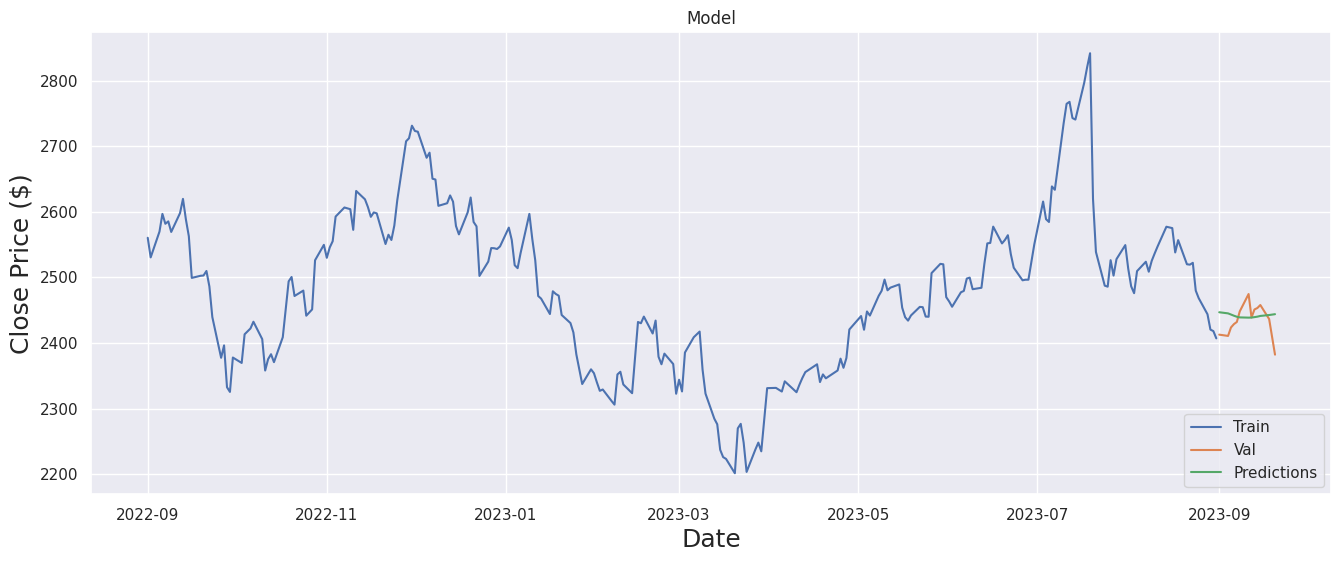

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

Epoch 1/52
4/4 [==============================] - 2s 501ms/step - loss: 0.0119 - val_loss: 0.0343
Epoch 2/52
4/4 [==============================] - 0s 82ms/step - loss: 0.0116 - val_loss: 0.0345
Epoch 3/52
4/4 [==============================] - 0s 56ms/step - loss: 0.0117 - val_loss: 0.0373
Epoch 4/52
4/4 [==============================] - 0s 47ms/step - loss: 0.0124 - val_loss: 0.0369
Epoch 5/52
4/4 [==============================] - 0s 51ms/step - loss: 0.0115 - val_loss: 0.0381
Epoch 6/52
4/4 [==============================] - 0s 50ms/step - loss: 0.0113 - val_loss: 0.0479
Epoch 7/52
4/4 [==============================] - 0s 47ms/step - loss: 0.0138 - val_loss: 0.0378
Epoch 8/52
4/4 [==============================] - 0s 46ms/step - loss: 0.0122 - val_loss: 0.0418
Epoch 9/52
4/4 [==============================] - 0s 44ms/step - loss: 0.0137 - val_loss: 0.0388
Epoch 10/52
4/4 [==============================] - 0s 51ms/step - loss: 0.0111 - val_loss: 0.0440
Epoch 11/52
4/4 [===========

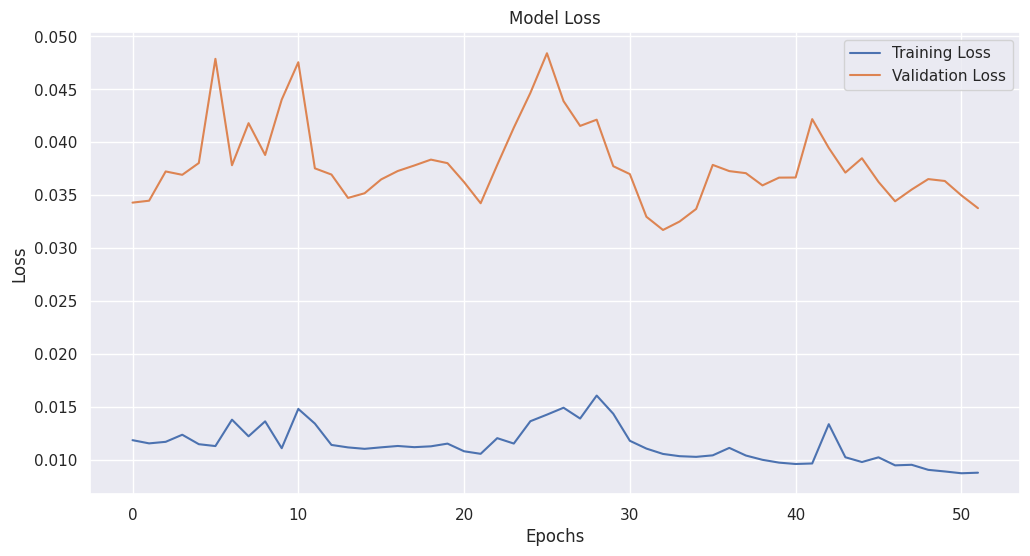

In [62]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=50, epochs=52, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# It's a regression problem, typically we don't have an accuracy metric.
